# Lab 2 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Regressão Logística e Rede Neural

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Regressão e Descida do Gradiente

Data da entrega : 26/08 

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/MWB1mHjTADbnD6kN8)


# Classificação utilizando frameworks

 - Trabalharemos com um problema de classificação: é um gato ou não é um gato.
 - Utilizaremos um framework: o Tensorflow/Keras.

## Importando os pacotes

Primeiro, vamos executar a célula abaixo para importar todos os pacotes que precisaremos.
- [numpy](www.numpy.org) é o pacote fundamental para a computação científica com Python.
- [h5py](http://www.h5py.org) é um pacote comum para interagir com um conjunto de dados armazenado em um arquivo H5.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa para plotar gráficos em Python.
- [PIL](http://www.pythonware.com/products/pil/) e [scipy](https://www.scipy.org/) são usados aqui para testar seu modelo.
- [tensorflow](https://www.tensorflow.org/?hl=pt-br) é uma biblioteca famosa para criar e treinar modelos de Deep Learning.
- np.random.seed (1) é usado para manter todas as chamadas de funções aleatórias. 

In [60]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import random

from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import initializers

Configurando o matplotlib e a geração de dados aleatórios

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Configurando o Google Colab

In [3]:
# Para Google Colab: Você vai precisar fazer o upload dos arquivos no seu drive e montá-lo
# não se esqueça de ajustar o path para o seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregando os dados (10pt)

Coloque os arquivos *train_catvnonvat.h5* e *test_catvnoncat.h5* na pasta raiz do seu Drive. Ambos os arquivos estão na pasta dataset da pasta compartilhada.

In [4]:
# Lendo os dados (gato/não-gato)
def load_dataset():

  train_dataset = h5py.File('train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
# Lendo os dados (gato/não-gato)
treino_x_orig, treino_y, teste_x_orig, teste_y, classes = load_dataset()

### Pré-processamento dos dados

Pre-processamento necessário. Iremos converter a imagem 3D (64x64x3) em um único vetor 1D (12288 = 64x64x3). A figura mostra um exemplo do pré-processamento executado (imagem vetorizada)

![Arq,widht=10](https://drive.google.com/uc?export=view&id=1zCnEB2rwc4lXU_7RTS4TXhqCwsJubg7H)

<caption><center> <u>Figura</u>: Vetorização de uma imagem. <br> </center></caption>

### **ToDo:** Vetorização da imagem (10pt)

Converta as imagens do formato 64x64x3 para 12288x1.

In [6]:
m_treino = len(treino_x_orig)
m_teste = len(teste_x_orig)
num_px = teste_x_orig[1].shape[1]


#  Vetorizando as imagens de treinamento e teste 

### Início do código ###
treino_x = treino_x_orig.reshape((m_treino, num_px*num_px*3)) # dica : utilize reshape para mudar o formato dos dados
### Fim do código ###

### Início do código ###
# Normalize os dados para ter valores de recurso entre 0 e 1.
teste_x = teste_x_orig.reshape((m_teste, num_px*num_px*3)) # dica : utilize reshape para mudar o formato dos dados
### Fim do código ###

## Testando redes neurais e *sigmoid*

Para classificação de classes 0 ou 1, pode-se ter um único neurônio de saída e deve-se usar a operação sigmoid antes de se calcular o custo (mean-squared error ou binary cross entropy).



### Testando uma rede com uma camada oculta

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19mux_FFpeZkj5YiV51bNE2CK3i2nBSau)
<caption><center> <u>Figura 7</u>: Rede neural com 2 camadas. <br> Resumo do modelo: ***ENTRADA -> LINEAR -> RELU -> LINEAR -> SIGMOID -> SAIDA***. </center></caption>

<!--
<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.
!-->

In [7]:
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta'))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 17ms/step - loss: 1535.8176
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 307.5937
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 112.6771
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 80.6408
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 50.2477
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 35.6524
Epoch 7/100
7/7 [=======

**Use os parâmetros treinados** para classificar as imagens de treinamento e teste e verificar a acurácia. 

In [8]:
## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Acurácia no treino: 100.00
Acurácia no teste: 68.00


**Resultado esperado:**

```
  Acurácia treino = 100%
  Acurácia teste = 64%
```

#### **ToDo:** Análise dos resultados (5pt)

Por que você obteve 100% no treino e apenas 64% no teste?

`Porque a rede neural ficou muito sobreajustada aos dados de treino e não conseguiu acertar bem os dados de teste, houve um overfitting.`

### Testando com uma rede com três camadas ocultas

![Arq,widht=10](https://drive.google.com/uc?export=view&id=19h9LuWkWLVMYgAAoQKTfjJ-Er-tlw8En)
<caption><center> <u>Figura 8</u>: Rede neural com L camadas. <br> Resumo do modelo: ***ENTRADA -> LINEAR -> RELU -> LINEAR -> SIGMOID -> SAIDA***. </center></caption>

In [ ]:
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 3 camadas ocultas ###
# Camadas da rede = [12288, 200, 70, 5, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta1'))
model.add(Dense(70, activation='relu', name='CamadaOculta2'))
model.add(Dense(5, activation='relu', name='CamadaOculta3'))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta1 (Dense)        (None, 200)               2457800   
_________________________________________________________________
CamadaOculta2 (Dense)        (None, 70)                14070     
_________________________________________________________________
CamadaOculta3 (Dense)        (None, 5)                 355       
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 6         
Total params: 2,472,231
Trainable params: 2,472,231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
7/7 [==============================] - 1s 21ms/step - loss: 78.2490
Epoch 2/50
7/7 [==============================] - 0s 20ms/step - loss: 0.6926
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 0.6919
Epoch 4

**Use os parâmetros treinados** para classificar as imagens de treinamento e teste e verificar a acurácia. 

In [ ]:
## Predição da rede
print(f'Train accuracy: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Test accuracy: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Train accuracy: 65.55
Train accuracy: 34.00


**Resultado esperado:**

```
  Acurácia treino = 65.55%
  Acurácia teste = 34.00%
```

#### **ToDo:** Análise dos resultados (5pt)

O resultado com três camadas ocultas foi melhor ou pior do que usa somente uma camada? Tente explicar os motivos.


`Foi pior, errou mais no conjunto de treino e de teste. Isso aconteceu porque a informação passadas pelas múltiplas camadas alteravam muito os pesos, impedindo o modelo de aprender.`

### **ToDo:** Teste uma rede (20pt)

Crie uma arquitetura e treine/teste o seu modelo

In [ ]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 8193, 1] 

# Definição do modelo
model2 = Sequential()
model2.add(Dense(8193, input_shape=(12288,), activation='relu', name='CamadaOculta'))
model2.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model2.compile(loss='binary_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model2.summary()

# Treinando o modelo
model2.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Train accuracy: {accuracy_score(treino_y.reshape(-1), np.round(model2.predict(treino_x))) * 100:.2f}')
print(f'Test accuracy: {accuracy_score(teste_y.reshape(-1), np.round(model2.predict(teste_x))) * 100:.2f}')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 8193)              100683777 
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 8194      
Total params: 100,691,971
Trainable params: 100,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 7s 865ms/step - loss: 9782.3916
Epoch 2/100
7/7 [==============================] - 7s 1s/step - loss: 3788.6687
Epoch 3/100
7/7 [==============================] - 5s 713ms/step - loss: 2056.2996
Epoch 4/100
7/7 [==============================] - 4s 604ms/step - loss: 1779.8491
Epoch 5/100
7/7 [==============================] - 4s 578ms/step - loss: 940.6163
Epoch 6/100
7/7 [==============================] - 5s 666ms/step - loss: 328.7968
Epoch 7/1

## Testando redes neurais e *softmax*

Para classificação de múltiplas classes, tem-se um neurônio de saída para cada classe (como ilustrado no exemplo da Figura 1) e deve-se usar a operação Softmax antes de se calcular o custo (entropia cruzada ou cross-entropy como no exemplo anterior). Consute o capítulo [3.6 do livro](http://d2l.ai/chapter_linear-networks/softmax-regression-scratch.html) para entender melhor.  No caso de se usar softmax, deve-se usar a função **one_hot** para transformar a saída em logits. 

A função **one_hot** transforma um escalar em um **hot encoder**, de acordo com o número de classes.

![Arq,widht=10](https://drive.google.com/uc?export=view&id=1WV_4AT49bYcqsp6PB0FoO4p-gASo0bjL)<caption><center> <u>Figura 1</u>: Rede neural dois neurônios de saída. <br> </center></caption>

### Função de **one-hot encoded**

In [ ]:
indices = [0, 1, 2]
depth = 3
tf.one_hot(indices, depth)  # output: [3 x 3]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

**Saída esperada** 
```
 [[1., 0., 0.],
  [0., 1., 0.],
  [0., 0., 1.]]
```

#### **ToDo**: Função one-hot encoded (5pt)

O que a função one-hot encoded faz com o vetor na prática?

`Tranforma cada possível valor do vetor(rótulo) em um vetor do tamanho da quantidade de valores(rótulos) possíveis. Cada vetor produzido possui em suas posições os valores de 0 ou 1, onde 1 representa que um rótulo está ativo. O vetor na realidade vira um vetor com esses vetores (uma matriz).`

### Função **SoftMax**

A função softmax transforma a saída em uma distribuição de probabilidades. Assim, a soma de todas as saídas dos neurônio da última camada sempre vai ser igual a 1:

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

o gradiente para o custo usando-se a função softmax é trivial de se calcular:

$$dw = softmax(\mathbf{y_{pred}}) - y$$

In [ ]:
indices = [-1., 0., 1.]

print(tf.nn.softmax(indices))

tf.Tensor([0.09003057 0.24472848 0.66524094], shape=(3,), dtype=float32)


**Saída esperada**

```
 [0.09003057, 0.24472848, 0.66524094]
```

Perceba que esse código também funciona se você passar um lote (batch) de amostras

In [ ]:
# Veja a saída abaixo
X = np.array([[10., 2., -3.],
              [-1., 5., -20.]])
print(tf.nn.softmax(X))

tf.Tensor(
[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]], shape=(2, 3), dtype=float64)


#### **ToDo**: Função softmax (5pt)

O que a função softmax faz com o vetor na prática?

`A função softmax transforma a saída em uma distribuição de probabilidades que somadas resulta em 1. Ela retorna um vetor como resultado, com a probabilidade(distribuição) de cada elemento do vetor passado como parâmetro. Quanto maior o elemento maior será sua probabilidade. Isso ajudará na classificação de múltiplas classes.`

### Função de erro

Em seguida, deve-se computar o erro entre um vetor predito (**Y_pred**) e o vetor de real de rótulos (**Y_true**). para tal, deve-se usar cross entropy loss, ou verossimilhança negativa (negative log likelihood). A função **cross_entropy()** implementa a verossimilhança negativa.

```
tf.keras.losses.CategoricalCrossentropy()
```

Erro de uma predição bem ruim

In [9]:
y_true = [[1, 0, 0]]
y_pred = [[0.12, 4, 10]]

cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred).numpy())


4.7678556


Erro de uma boa predição

In [10]:
y_true = [[1, 0, 0]]
y_pred = [[0.97, 0.01, 0.02]]

cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred).numpy())


0.030459179


A função de erro também funciona para um lote de dados.

In [11]:
y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

y_pred = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred).numpy())


0.0033501784782856703


#### **ToDo:** Função de erro (5pt)

Explique a função de erro *Categorical Cross-entropy*.

`Ela calcula a perda de entropia cruzada entre os rótulos e as previsões, ou seja, é a medida da diferença entre duas distribuições, no caso a real e a predita. A função de perda requer as seguintes entradas: y_true(rótulo verdadeiro): isso é 0 ou 1,
y_pred(valor previsto): previsão do modelo, ou seja, um único valor de ponto flutuante.`

### Testando uma rede com uma camada oculta

Para esta atividade você deve usar uma loss (ou função de perda) baseada em softmax.




In [15]:
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta'))
model.add(Dense(2, activation='softmax', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, tf.one_hot(treino_y.reshape(-1), 2), epochs=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 2)                 402       
Total params: 2,458,202
Trainable params: 2,458,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 1801.8815
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 474.2288
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 235.8729
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 182.7170
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 65.2800
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 45.2471
Epoch 7/100
7/7 [====

**Use os parâmetros treinados** para classificar as imagens de treinamento e teste e verificar a acurácia. 

In [13]:
## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.argmax(model.predict(treino_x), axis=1)) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.argmax(model.predict(teste_x), axis=1)) * 100:.2f}')

Acurácia no treino: 100.00
Acurácia no teste: 70.00


**Resultado esperado:**

```
  Acurácia treino = 100%
  Acurácia teste = 70%
```

### **ToDo:** Testando outras redes (20pt)

Primero, implemente a rede de três camadas ocultas (mesma arquitetura utilizada com sigmoid). Por fim, repita o teste com uma arquitetura projetada por você, de preferência, bem profunda e mais larga.
Plote a curva de custo (epochs vs loss) para cada um dos dois casos. O que você conclui?

In [50]:
### Início do código ###
## Setando a seed
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 3 camadas ocultas ###
# Camadas da rede = [12288, 200, 70, 5, 2] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta1'))
model.add(Dense(70, activation='relu', name='CamadaOculta2'))
model.add(Dense(5, activation='relu', name='CamadaOculta3'))
model.add(Dense(2, activation='softmax', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
history = model.fit(treino_x, tf.one_hot(treino_y.reshape(-1), 2), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.argmax(model.predict(treino_x), axis=1)) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.argmax(model.predict(teste_x), axis=1)) * 100:.2f}')

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta1 (Dense)        (None, 200)               2457800   
_________________________________________________________________
CamadaOculta2 (Dense)        (None, 70)                14070     
_________________________________________________________________
CamadaOculta3 (Dense)        (None, 5)                 355       
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 2)                 12        
Total params: 2,472,237
Trainable params: 2,472,237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 22ms/step - loss: 162.7314
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 0.6911
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 0.6898
Ep

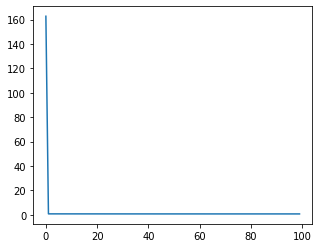

In [55]:
plt.plot(history.epoch, history.history['loss'], label="Distribuição do Erro")

In [58]:
### Início do código ###
## Setando a seed
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 7 camadas ocultas ###
# Camadas da rede = [12288, 500, 200, 70, 50, 20, 10 5, 2] 

# Definição do modelo
model = Sequential()
model.add(Dense(500, input_shape=(12288,), activation='relu', name='CamadaOculta1'))
model.add(Dense(200, activation='relu', name='CamadaOculta2'))
model.add(Dense(70, activation='relu', name='CamadaOculta3'))
model.add(Dense(50, activation='relu', name='CamadaOculta4'))
model.add(Dense(10, activation='relu', name='CamadaOculta5'))
model.add(Dense(5, activation='relu', name='CamadaOculta6'))
model.add(Dense(2, activation='softmax', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
history = model.fit(treino_x, tf.one_hot(treino_y.reshape(-1), 2), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.argmax(model.predict(treino_x), axis=1)) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.argmax(model.predict(teste_x), axis=1)) * 100:.2f}')

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta1 (Dense)        (None, 500)               6144500   
_________________________________________________________________
CamadaOculta2 (Dense)        (None, 200)               100200    
_________________________________________________________________
CamadaOculta3 (Dense)        (None, 70)                14070     
_________________________________________________________________
CamadaOculta4 (Dense)        (None, 50)                3550      
_________________________________________________________________
CamadaOculta5 (Dense)        (None, 10)                510       
_________________________________________________________________
CamadaOculta6 (Dense)        (None, 5)                 55        
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 2)               

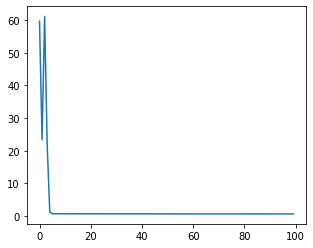

In [59]:
plt.plot(history.epoch, history.history['loss'], label="Distribuição do Erro")

É possível concluir que em redes neurais mais largas e profundas o erro no início das épocas sofre mais variação para depois convergir a um determinado erro menor.

### **ToDo:** Variando alguns hiperparâmetros (20pt)

Usando o framework do tensorflow/keras, altere os hiperparâmetros e veja o impacto (gere pelo menos dois novos modelos):

- learning rate,
- Algoritmo de otimização (SGD com momento, ADAM, ADADELTA, RMSPROP),
- inicialização dos pesos: inicialiação aleatória vs uniforme,
- Funções de ativação : troque a sigmoid por (ReLU, GELU, Leaky RELU),

In [66]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta', kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='sgd')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 18ms/step - loss: 38327348.0000
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 6015.2441
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 8.1164
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6439
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.6428
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6419
Epoch 7/100
7/7 [====

In [68]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta', kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adadelta')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 5150.7856
Epoch 2/100
7/7 [==============================] - 0s 41ms/step - loss: 5120.8037
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 5090.1641
Epoch 4/100
7/7 [==============================] - 0s 51ms/step - loss: 5058.9863
Epoch 5/100
7/7 [==============================] - 0s 37ms/step - loss: 5027.8867
Epoch 6/100
7/7 [==============================] - 0s 35ms/step - loss: 4995.3882
Epoch 7/100
7

In [70]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta', kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='RMSPROP')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 2s 57ms/step - loss: 4054.2173
Epoch 2/100
7/7 [==============================] - 0s 56ms/step - loss: 1864.2961
Epoch 3/100
7/7 [==============================] - 0s 59ms/step - loss: 2696.4651
Epoch 4/100
7/7 [==============================] - 0s 56ms/step - loss: 1865.5386
Epoch 5/100
7/7 [==============================] - 0s 45ms/step - loss: 2217.2871
Epoch 6/100
7/7 [==============================] - 0s 58ms/step - loss: 1321.0811
Epoch 7/100
7

In [71]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='gelu', name='CamadaOculta', kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='RMSPROP')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 46ms/step - loss: 5737.9663
Epoch 2/100
7/7 [==============================] - 0s 54ms/step - loss: 2765.4031
Epoch 3/100
7/7 [==============================] - 0s 54ms/step - loss: 2231.6526
Epoch 4/100
7/7 [==============================] - 0s 56ms/step - loss: 1640.0140
Epoch 5/100
7/7 [==============================] - 0s 49ms/step - loss: 2217.1462
Epoch 6/100
7/7 [==============================] - 0s 58ms/step - loss: 2310.2590
Epoch 7/100
7

In [74]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='gelu', name='CamadaOculta', kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.)))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')



Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 2996.5029
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 1741.5472
Epoch 3/100
7/7 [==============================] - 0s 29ms/step - loss: 1315.8313
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 880.3184
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 732.8141
Epoch 6/100
7/7 [==============================] - 0s 27ms/step - loss: 473.6812
Epoch 7/100
7/7 

In [75]:
### Início do código ###
## Setando a seed
np.random.seed(1)
random.seed(1)

### Executar uma rede de 1 camada oculta ###
# Camadas da rede = [12288, 200, 1] 

# Definição do modelo
model = Sequential()
model.add(Dense(200, input_shape=(12288,), activation='relu', name='CamadaOculta'))
model.add(Dense(1, activation='sigmoid', name='CamadaClassificacao'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Imprimindo a arquitetura da rede proposta
model.summary()

# Treinando o modelo
model.fit(treino_x, treino_y.reshape(-1), epochs=100)
### Fim do código ###

## Predição da rede
print(f'Acurácia no treino: {accuracy_score(treino_y.reshape(-1), np.round(model.predict(treino_x))) * 100:.2f}')
print(f'Acurácia no teste: {accuracy_score(teste_y.reshape(-1), np.round(model.predict(teste_x))) * 100:.2f}')



Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CamadaOculta (Dense)         (None, 200)               2457800   
_________________________________________________________________
CamadaClassificacao (Dense)  (None, 1)                 201       
Total params: 2,458,001
Trainable params: 2,458,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 21ms/step - loss: 1899.5931
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 609.6093
Epoch 3/100
7/7 [==============================] - 0s 28ms/step - loss: 267.2789
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 152.4326
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 110.7168
Epoch 6/100
7/7 [==============================] - 0s 27ms/step - loss: 36.1824
Epoch 7/100
7/7 [==

#### **ToDo:** Analisando redes treinadas (5pt)

Qual combinação rendeu o melhor resultado? Tente explicar o por que.

` A melhor combinação para um rede de 1 camada oculta com 200 neurônios foi a rede que utilizou: inicialização de pesos uniformes, a função relu como função de ativação e o algoritmo de otimização adam. Isso acontece porque a função ReLU não ativa todos os neurônios ao mesmo tempo, isso significa que, ao mesmo tempo, apenas alguns neurônios são ativados, tornando a rede esparsa e eficiente e fácil para a computação. Com a inicialização do pesos de maneira uniforme evita-se o problema com a saturação dos neurônios. Já o uso do Adam como otimizador garante eficiência ao trabalhar com problemas envolvendo muitos dados ou parâmetros, como neste caso.`